In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../injury_fatality/Injury_and_Fatality_Cleaned.csv'
monthly_trend = pd.read_csv(file_path)




In [36]:
#Convert CRASH DATE to datetime format
monthly_trend['CRASH DATE'] = pd.to_datetime(monthly_trend['CRASH DATE'])

# Extract month
monthly_trend['Month'] = monthly_trend['CRASH DATE'].dt.month

In [37]:
# Group by Month and calculate the total number of injuries and fatalities
monthly_injuries = monthly_trend.groupby('Month')['TOTAL_INJURED'].sum().reset_index()
monthly_fatalities = monthly_trend.groupby('Month')['TOTAL_KILLED'].sum().reset_index()

# Mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_injuries['Month_Name'] = monthly_injuries['Month'].map(month_names)
monthly_fatalities['Month_Name'] = monthly_fatalities['Month'].map(month_names)


In [61]:
# Sort the DataFrames by Month to ensure correct order in the plots
monthly_injuries = monthly_injuries.sort_values('Month')
monthly_fatalities = monthly_fatalities.sort_values('Month')

# Sort the DataFrames by Month to ensure correct order in the plots
monthly_injuries = monthly_injuries.sort_values('Month')
monthly_fatalities = monthly_fatalities.sort_values('Month')

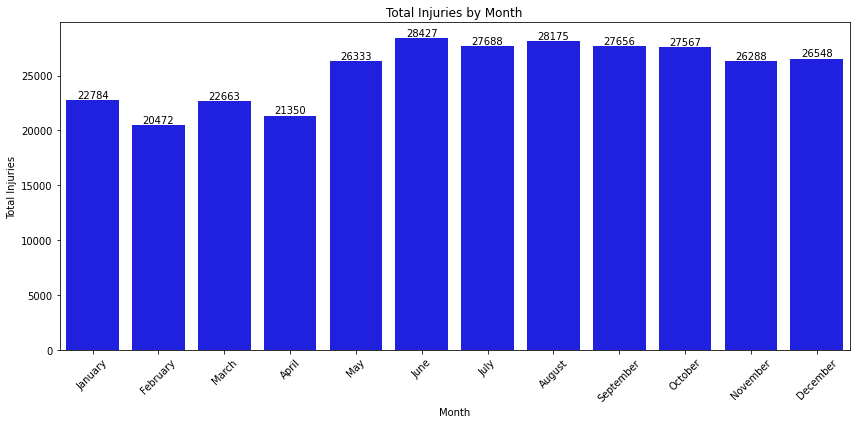

In [66]:
# Create a bar plot for monthly injuries
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Month_Name', y='TOTAL_INJURED', data=monthly_injuries, color='blue')
plt.title('Total Injuries by Month')
plt.xlabel('Month')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the total values using .iterrows()
for index, row in monthly_injuries.iterrows():
    ax.text(row.name, row.TOTAL_INJURED, f'{row.TOTAL_INJURED:.0f}', color='black', ha="center", va="bottom")

plt.show()

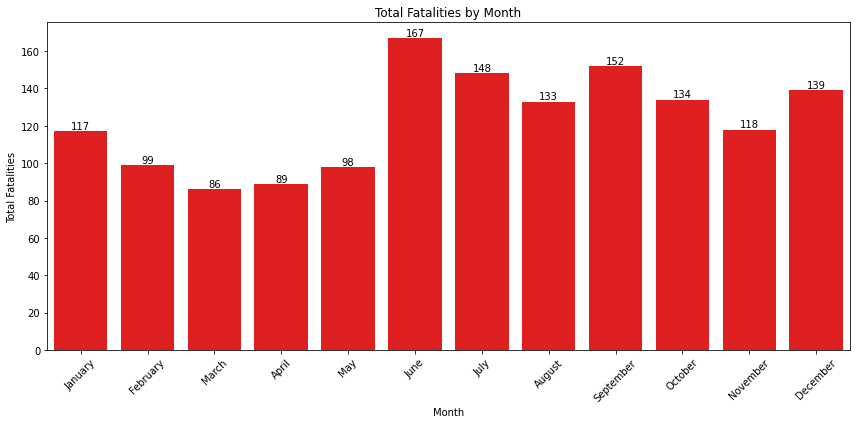

In [67]:
# Create a bar plot for monthly fatalities

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Month_Name', y='TOTAL_KILLED', data=monthly_fatalities, color='red')
plt.title('Total Fatalities by Month')
plt.xlabel('Month')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the total values using .iterrows()
for index, row in monthly_fatalities.iterrows():
    ax.text(row.name, row.TOTAL_KILLED, f'{row.TOTAL_KILLED:.0f}', color='black', ha="center", va="bottom")